In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
!ls ..

 Beam4_Rayfile_484_allwl_0_10.xlsx    HOE_LSSCalyps_21022017.OPT
Beam4_Rayfile_121_1000nm_0_0.RAY      HOE_LSSCalyps_28022017.OPT
Beam4_Rayfile_121_1000nm_0_0.xlsx     HOE_LSSCalyps_XYZ_1000nm_21022017.RAY
Beam4_Rayfile_121_1000nm_0_10.RAY     HOE_LSSCalyps_XYZ_400nm_21022017.RAY
Beam4_Rayfile_121_400nm_0_0.RAY       HOE_LSSCalyps_XYZ_400nm_21022017.RAY~
Beam4_Rayfile_121_400nm_0_10.RAY      HOE_LSSCalyps_XYZ_600nm_21022017.RAY
Beam4_Rayfile_121_400nm_10_0.RAY      HOE_LSSCalyps_XYZ_800nm_21022017.RAY
Beam4_Rayfile_121_400nm_10_10.RAY     HOE_LSSCalyps_XYZ_allwl_21022017.RAY
Beam4_Rayfile_121_600nm_0_0.RAY       LENS.RAY
Beam4_Rayfile_121_600nm_0_10.RAY      Quick1.png
Beam4_Rayfile_121_800nm_0_0.RAY       Quick2.png
Beam4_Rayfile_121_800nm_0_10.RAY      RaySingleFocus.RAY
Beam4_Rayfile_484_allwl_0_0.RAY       SquareBeam.RAY
Beam4_Rayfile_484_allwl_0_0.RAY~      analysis
Beam4_Rayfile_484_allwl_0_10.RAY      python
Beam4_Rayfile_484_allwl_0_10.RAY~


In [4]:
rayfile="../Beam4_Rayfile_484_allwl_0_10.xlsx"

In [6]:
input = pd.ExcelFile(rayfile)

In [8]:
sheet_name=input.sheet_names[0]

In [44]:
df_colname = input.parse(sheet_name,index_row=0,usecols=range(0,13))

In [46]:
df_colname.head()

,484 rays Beam4_Rayfile_484_allwl_0_10.RAY,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,X0,Y0,Z0,U0,V0,W0,wave,WFE,Xgoal,Ygoal,Xfinal,Yfinal,Notes
1,---------------,---------------,---------------,---------------,---------------,---------------,---------------,---------------,---------------,---------------,---------------,---------------,----------
2,-2.91379,-6.54541,0,0.0252379,0.0249472,0.99937,0.0004,-0.274853,NaN,NaN,0.0029314,-7.93411,OK 3
3,-2.33103,-6.54541,0,0.0201926,0.0249501,0.999485,0.0004,-0.261615,NaN,NaN,0.0023463,-7.93411,OK 3
4,-1.74827,-6.54541,0,0.0151458,0.0249523,0.999574,0.0004,-0.251315,NaN,NaN,0.0017604,-7.93411,OK 3


In [43]:
df = input.parse(sheet_name,header=2,usecols=range(0,13))
df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]

In [47]:
df.head()

,X0,Y0,Z0,U0,V0,W0,wave,WFE,Xgoal,Ygoal,Xfinal,Yfinal,Notes
0,-2.913785,-6.545414,0,0.025238,0.024947,0.999370,0.0004,-0.274853,NaN,NaN,0.002931,-7.934112,OK 3
1,-2.331028,-6.545414,0,0.020193,0.024950,0.999485,0.0004,-0.261615,NaN,NaN,0.002346,-7.934110,OK 3
2,-1.748271,-6.545414,0,0.015146,0.024952,0.999574,0.0004,-0.251315,NaN,NaN,0.001760,-7.934108,OK 3
3,-1.165514,-6.545414,0,0.010098,0.024954,0.999638,0.0004,-0.243956,NaN,NaN,0.001174,-7.934107,OK 3
4,-0.582757,-6.545414,0,0.005049,0.024955,0.999676,0.0004,-0.239540,NaN,NaN,0.000587,-7.934107,OK 3


In [49]:
wave=df["wave"]

In [50]:
Xfinal=df["Xfinal"]
Yfinal=df["Yfinal"]

In [53]:
selected_indexes1=np.where(wave==0.0004)
selected_indexes2=np.where(wave==0.0006)
selected_indexes3=np.where(wave==0.0008)
selected_indexes4=np.where(wave==0.0010)

In [56]:
selected_indexes1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]),)

In [58]:
x1=Xfinal[selected_indexes1[0]]
y1=Yfinal[selected_indexes1[0]]

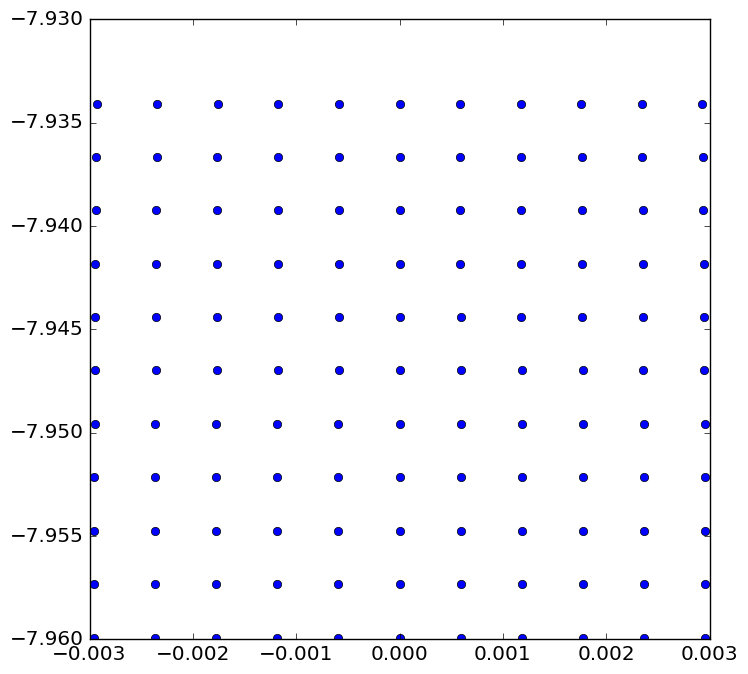

In [62]:
plt.plot(x1,y1,"bo")

In [63]:
x1.std()

0.0018719627937452883

In [64]:
y1.std()

0.008198077394444423